#      United States Geological Survey (USGS) Seismic Activity in 2022

I. Libraries Required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from matplotlib.ticker import MultipleLocator
pd.options.mode.chained_assignment = None  # default='warn'

II. Import Dataset

In [2]:
main = pd.read_csv('usgs_main.csv')

III. Data Cleaning/Formatting

In [3]:
main.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-03-04T21:28:02.440Z,38.759666,-122.719666,1.61,1.24,md,14.0,115.0,0.004494,0.04,...,2022-03-04T21:29:36.906Z,"3km SW of Anderson Springs, CA",earthquake,0.30,0.36,0.100,5.0,automatic,nc,nc
1,2022-03-04T21:27:28.190Z,38.833832,-122.815498,1.82,1.13,md,22.0,66.0,0.016320,0.02,...,2022-03-04T21:29:02.128Z,"8km NW of The Geysers, CA",earthquake,0.19,0.53,0.140,4.0,automatic,nc,nc
2,2022-03-04T21:25:05.130Z,35.596668,-120.271332,11.57,2.31,md,5.0,178.0,0.159000,0.01,...,2022-03-04T21:26:56.893Z,"11km SE of Shandon, CA",earthquake,3.14,3.51,0.760,3.0,automatic,nc,nc
3,2022-03-04T21:20:43.590Z,35.929167,-117.660833,3.25,0.88,ml,9.0,73.0,0.020530,0.13,...,2022-03-04T21:24:10.449Z,"22km E of Little Lake, CA",earthquake,0.33,0.74,0.055,10.0,automatic,ci,ci
4,2022-03-04T21:19:08.215Z,62.360200,-149.634500,9.80,1.40,ml,NaN,NaN,NaN,0.52,...,2022-03-04T21:22:15.794Z,"24 km NNE of Susitna North, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak


After reviewing the dataframe, the first step will be to create a new column containing the state in which the seismic activity's epicenter was located. I have discovered that reverse geocoding methods (such as geopy + Nominatim) will not work with a dataset of this size; I will instead extract this information from the text string in the 'place' column. 

The 'place' column contains both full names and abbreviations for the states, so a dictionary was created as an iterable to be used in conjunction with our original dataframe. The 'place' column also contains a directional abbreviation which could be mistaken for a state (NE).

In [4]:
state_dict = {'Alabama': 'AL',
'Alaska': 'AK',
'Arizona': 'AZ',
'Arkansas': 'AR',
'California': 'CA',
'Colorado': 'CO',
'Connecticut': 'CT',
'Delaware': 'DE',
'Florida': 'FL',
'Georgia': 'GA',
'Hawaii': 'HI',
'Idaho': 'ID',
'Illinois': 'IL',
'Indiana': 'IN',
'Iowa': 'IA',
'Kansas': 'KS',
'Kentucky': 'KY',
'Louisiana': 'LA',
'Maine': 'ME',
'Maryland': 'MD',
'Massachusetts': 'MA',
'Michigan': 'MI',
'Minnesota': 'MN',
'Mississippi': 'MS',
'Missouri': 'MO',
'Montana': 'MT',
'Nebraska': 'NE',
'Nevada': 'NV',
'New Hampshire': 'NH',
'New Jersey': 'NJ',
'New Mexico': 'NM',
'New York': 'NY',
'North Carolina': 'NC',
'North Dakota': 'ND',
'Ohio': 'OH',
'Oklahoma': 'OK',
'Oregon': 'OR',
'Pennsylvania': 'PA',
'Rhode Island': 'RI',
'South Carolina': 'SC',
'South Dakota': 'SD',
'Tennessee': 'TN',
'Texas': 'TX',
'Utah': 'UT',
'Vermont': 'VT',
'Virginia': 'VA',
'Washington': 'WA',
'West Virginia': 'WV',
'Wisconsin': 'WI',
'Wyoming': 'WY', 'Virgin Islands': 'VIRG', 'Puerto Rico':'PR'}

A nested for loop was used to check every entry in the state dictionary against the end of the text string in place, as each string is formatted with "city, state" at the end. If the string ended with the key (full name), this and the index were added to an empty list; if the string did not end with the full name, the dictionary value (abbreviation) was checked. This process was completed for every row in the original dataframe.

In [5]:
valid_indices = []
for index, row in main.iterrows():
    for x in state_dict:
        if row['place'].endswith(x):
            valid_indices.append(index)
            break
        elif row['place'].endswith(state_dict[x]):
            valid_indices.append(index)
            break

In [ ]:
main = pd.read_csv('usgs_main.csv')

'''find rows that end in either a full state name or abbreviation'''
valid_indices = []
for index, row in main.iterrows():
    for x in state_dict:
        if row['place'].endswith(x):
            valid_indices.append(index)
            break
        elif row['place'].endswith(state_dict[x]):
            valid_indices.append(index)
            break

'''find those that do not'''
main[~main.index.isin(valid_indices)]

'''creates a new column with the full state name for each match'''
states = []
for row in US_df['place']:
    for x in state_dict:
        if row.endswith(x):
            states.append(x)
            break
        elif row.endswith(state_dict[x]):
            states.append(x)
            break
US_df['state'] = states

When the shape of both the dataframe and list were printed, we see that for 7315 rows, the 'place' column did not end with any of the state/abbreviations listed in our dictionary.

In [6]:
print(np.shape(main))
print(np.shape(valid_indices))

(75810, 22)
(68495,)


Subsetting our original dataframe to exclude all rows in our valid_indices list gives us the 7315 rows whose 'place' column does not end with a matching name/abbreviation in our state dictionary. This reveals that the original dataframe contained records where the seismic epicenter was outside of the United States, Puerto Rico and the Virgin Islands; these records are therefore out of the scope for this analysis. 

In [7]:
main[~main.index.isin(valid_indices)]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
30,2022-03-04T17:55:37.910Z,32.0947,50.1885,11.630,4.4,mb,NaN,89.0,4.794,0.64,...,2022-03-04T20:22:50.040Z,"39 km WSW of Fārsān, Iran",earthquake,9.90,3.000,0.061,80.0,reviewed,us,us
39,2022-03-04T16:59:42.707Z,-57.4719,-25.7697,66.540,5.0,mb,NaN,82.0,6.823,0.46,...,2022-03-04T19:06:11.040Z,South Sandwich Islands region,earthquake,11.70,6.200,0.111,28.0,reviewed,us,us
56,2022-03-04T15:01:40.531Z,-7.3847,128.4873,157.850,4.9,mb,NaN,48.0,2.849,0.97,...,2022-03-04T15:27:05.040Z,"206 km NE of Lospalos, Timor Leste",earthquake,8.40,1.900,0.064,77.0,reviewed,us,us
77,2022-03-04T13:14:17.165Z,-7.2204,105.2583,35.000,4.8,mb,NaN,138.0,2.384,0.87,...,2022-03-04T13:37:46.040Z,"112 km SW of Labuan, Indonesia",earthquake,7.20,2.000,0.082,46.0,reviewed,us,us
101,2022-03-04T10:46:14.761Z,27.1745,53.2459,10.000,4.4,mb,NaN,103.0,3.465,0.44,...,2022-03-04T11:02:42.040Z,"55 km SE of Mohr, Iran",earthquake,9.10,1.900,0.089,36.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75775,2022-12-12T18:37:10.959Z,-7.0568,124.7846,541.655,4.8,mb,63.0,55.0,2.730,0.52,...,2022-12-12T18:52:03.040Z,"178 km NNW of Maubara, Timor Leste",earthquake,9.56,7.044,0.070,63.0,reviewed,us,us
75788,2022-12-12T18:52:42.487Z,-11.8648,-73.9890,102.538,4.6,mb,23.0,111.0,2.795,0.65,...,2022-12-12T20:00:16.040Z,"83 km SE of Mazamari, Peru",earthquake,6.25,11.527,0.152,13.0,reviewed,us,us
75791,2022-12-12T19:18:06.311Z,32.0240,141.8060,10.000,4.9,mb,95.0,101.0,2.003,0.70,...,2022-12-12T20:30:07.040Z,"Izu Islands, Japan region",earthquake,10.01,1.871,0.048,139.0,reviewed,us,us
75793,2022-12-12T19:43:35.652Z,-5.9985,149.3020,79.725,4.6,mb,21.0,111.0,3.369,0.41,...,2022-12-12T20:42:01.040Z,"35 km NW of Kandrian, Papua New Guinea",earthquake,10.99,5.259,0.151,13.0,reviewed,us,us


Once we save our new dataframe containing seismic activity whose epicenter is within the United States, Puerto Rico and the Virgin Islands, a column with the specific state can be added. Similar to before, a nested for loop is used to iterate over our state dictionary for each row of our dataframe, and for any key or value which matches the end of our 'place' column entry, the full state name is added to a new list. Finally, that list is used to create the new column in our US_df dataframe. 

In [8]:
US_df = main[main.index.isin(valid_indices)]
states = []
for row in US_df['place']:
    for x in state_dict:
        if row.endswith(x):
            states.append(x)
            break
        elif row.endswith(state_dict[x]):
            states.append(x)
            break
US_df['state'] = states
US_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,state
0,2022-03-04T21:28:02.440Z,38.759666,-122.719666,1.61,1.24,md,14.0,115.00,0.004494,0.0400,...,"3km SW of Anderson Springs, CA",earthquake,0.30,0.36,0.100,5.0,automatic,nc,nc,California
1,2022-03-04T21:27:28.190Z,38.833832,-122.815498,1.82,1.13,md,22.0,66.00,0.016320,0.0200,...,"8km NW of The Geysers, CA",earthquake,0.19,0.53,0.140,4.0,automatic,nc,nc,California
2,2022-03-04T21:25:05.130Z,35.596668,-120.271332,11.57,2.31,md,5.0,178.00,0.159000,0.0100,...,"11km SE of Shandon, CA",earthquake,3.14,3.51,0.760,3.0,automatic,nc,nc,California
3,2022-03-04T21:20:43.590Z,35.929167,-117.660833,3.25,0.88,ml,9.0,73.00,0.020530,0.1300,...,"22km E of Little Lake, CA",earthquake,0.33,0.74,0.055,10.0,automatic,ci,ci,California
4,2022-03-04T21:19:08.215Z,62.360200,-149.634500,9.80,1.40,ml,NaN,NaN,NaN,0.5200,...,"24 km NNE of Susitna North, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak,Alaska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75804,2022-12-12T21:08:56.860Z,19.283300,-64.906100,24.00,3.55,md,7.0,300.00,0.931600,0.3200,...,"104 km N of Charlotte Amalie, U.S. Virgin Islands",earthquake,1.85,26.66,0.140,3.0,reviewed,pr,pr,Virgin Islands
75805,2022-12-12T08:04:39.081Z,38.248400,-118.357200,10.00,0.60,ml,10.0,148.98,0.116000,0.1196,...,"26 km SW of Mina, Nevada",earthquake,NaN,2.90,0.000,1.0,reviewed,nn,nn,Nevada
75806,2022-12-12T08:00:43.492Z,36.789300,-116.224700,5.10,0.10,ml,11.0,94.63,0.038000,0.0884,...,"49 km ESE of Beatty, Nevada",earthquake,NaN,2.30,0.430,7.0,reviewed,nn,nn,Nevada
75807,2022-12-12T22:36:07.230Z,33.032667,-116.396500,9.19,0.93,ml,17.0,77.00,0.110400,0.2600,...,"20km ESE of Julian, CA",earthquake,0.44,1.83,0.148,10.0,automatic,ci,ci,California


Many columns only contain metadata, such as the number of stations used to record the seismic activity or the distance between them. This also is out of the scope for our analysis, and therefore they will be removed. 

In [9]:
US_df = US_df.drop(['gap', 'id', 'locationSource', 'magSource', 'nst', 'dmin', 'net', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst', 'updated', 'status'], axis=1)
US_df

,time,latitude,longitude,depth,mag,magType,place,type,state
0,2022-03-04T21:28:02.440Z,38.759666,-122.719666,1.61,1.24,md,"3km SW of Anderson Springs, CA",earthquake,California
1,2022-03-04T21:27:28.190Z,38.833832,-122.815498,1.82,1.13,md,"8km NW of The Geysers, CA",earthquake,California
2,2022-03-04T21:25:05.130Z,35.596668,-120.271332,11.57,2.31,md,"11km SE of Shandon, CA",earthquake,California
3,2022-03-04T21:20:43.590Z,35.929167,-117.660833,3.25,0.88,ml,"22km E of Little Lake, CA",earthquake,California
4,2022-03-04T21:19:08.215Z,62.360200,-149.634500,9.80,1.40,ml,"24 km NNE of Susitna North, Alaska",earthquake,Alaska
...,...,...,...,...,...,...,...,...,...
75804,2022-12-12T21:08:56.860Z,19.283300,-64.906100,24.00,3.55,md,"104 km N of Charlotte Amalie, U.S. Virgin Islands",earthquake,Virgin Islands
75805,2022-12-12T08:04:39.081Z,38.248400,-118.357200,10.00,0.60,ml,"26 km SW of Mina, Nevada",earthquake,Nevada
75806,2022-12-12T08:00:43.492Z,36.789300,-116.224700,5.10,0.10,ml,"49 km ESE of Beatty, Nevada",earthquake,Nevada
75807,2022-12-12T22:36:07.230Z,33.032667,-116.396500,9.19,0.93,ml,"20km ESE of Julian, CA",earthquake,California


While earthquake intensity is relative to the proximity of the epicenter, the USGS provides information on how earthquake magnitude can be interpreted in terms of energy output equivalence. From this, they classify earthquakes based on the impact that their energy output would have on populations near the epicenter. A new column is added to our dataframe with these classifications, using a for loop with 'if, elif, else' statements which correspond to magnitude thresholds.
https://www.usgs.gov/media/images/eq-magnitude-energy-release-and-shaking-intensity-5.

In [10]:
severity = []
for x in US_df['mag']:
    if x <= 3.9:
        severity.append('not felt')
    elif x <= 4.9:
        severity.append('small')
    elif x <= 5.9:
        severity.append('moderate')
    else:
        severity.append('strong')
US_df['severity'] = severity

Similarly, the USGS has three classifications based on the depth of an earthquake's origin, and this will be added to the US_df dataframe as a new column using a for loop with 'if, elif, else' conditional statements.
https://www.usgs.gov/programs/earthquake-hazards/determining-depth-earthquake#:~:text=Shallow%20earthquakes%20are%20between%200,earthquakes%20deeper%20than%2070%20km

In [11]:
depth_category = []
for x in US_df['depth']:
    if x <= 70:
        depth_category.append('shallow')
    elif x <= 300:
        depth_category.append('intermediate')
    else:
        depth_category.append('deep')
US_df['depth category'] = depth_category

In [29]:
US_df.to_csv(r'C:\Users\Owner\Downloads\USGS Data\export_dataframe.csv')

With our datatframe now correctly formated, our cleaning process begins by checking for any null values in our columns. 

In [12]:
US_df.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag               14
magType           14
place              0
type               0
state              0
severity           0
depth category     0
dtype: int64

Without any recorded magnitude, these records offer no value to our analysis, and should be dropped. As one could assume, these same records were also the ones containing null values in the 'magType' column, and after dropping them our dataframe has no null values remaining. 

In [13]:
null_mag = US_df[US_df['mag'].isnull()].index
US_df.drop(null_mag, inplace = True)
US_df.isnull().sum()

time              0
latitude          0
longitude         0
depth             0
mag               0
magType           0
place             0
type              0
state             0
severity          0
depth category    0
dtype: int64

Our 'time' column has no null values, and the max/min dates are both valid. No further action is required. 

In [14]:
print('most recent recording = ' + str(US_df['time'].max()))
print('oldest recording = ' + str(US_df['time'].min()))

most recent recording = 2022-12-12T22:36:07.230Z
oldest recording = 2022-03-03T21:37:08.970Z


Our latitude and longitude columns also contain no null values, and conditional statements reveal that no records exist with values outside of the parameters for either. 

In [15]:
print(US_df[(US_df['latitude'] < -90) | (US_df['latitude'] > 90)])
print(US_df[(US_df['longitude'] < -180) | (US_df['longitude'] > 180)])

Empty DataFrame
Columns: [time, latitude, longitude, depth, mag, magType, place, type, state, severity, depth category]
Index: []
Empty DataFrame
Columns: [time, latitude, longitude, depth, mag, magType, place, type, state, severity, depth category]
Index: []


Our depth column has no null values, but there are rows where the depth value is outside of the thresholds provided by the USGS (0-700km). However, the USGS acknowledges that there are difficulties inherent in calculating depth which can result in a negative number for very shallow earthquakes (https://www.usgs.gov/faqs/what-does-it-mean-earthquake-occurred-depth-0-km-how-can-earthquake-have-negative-depth-would). No action is required. 

In [16]:
print('The deepest earthquake reading was at ' + str(US_df['depth'].max())+'km')
print('The shallowest earthquake reading was at ' + str(US_df['depth'].min())+'km')

The deepest earthquake reading was at 274.7km
The shallowest earthquake reading was at -3.8km


'magType' has  no null values, but they do have different abbreviations listed which can be used interchangeably to describe the same magnitude measurement type. These are:
1. Ml and ml
2. mww and mw
3. Mb and mb

These are replaced with whichever abbreviation was more common. 

In [17]:
print('Original value counts for magnitude types:')
print(US_df['magType'].value_counts())
US_df['magType'].replace(['Ml', 'mww', 'Mb'],['ml', 'mw', 'mb'], inplace = True)
print('Corrected value counts for magnitude types:')
print(US_df['magType'].value_counts())

Original value counts for magnitude types:
ml       43344
md       24598
mb         244
mb_lg      125
mh          52
mw          32
mlv         25
mww         17
mwr         16
Ml          12
mlr         11
Mi           3
Mb           2
Name: magType, dtype: int64
Corrected value counts for magnitude types:
ml       43356
md       24598
mb         246
mb_lg      125
mh          52
mw          49
mlv         25
mwr         16
mlr         11
Mi           3
Name: magType, dtype: int64


IV) Issues/Hypotheses to Explore

Issues to Analyze (1):
In what state(s) did the most seismic events occur? In which state(s) did the most earthquakes occur?

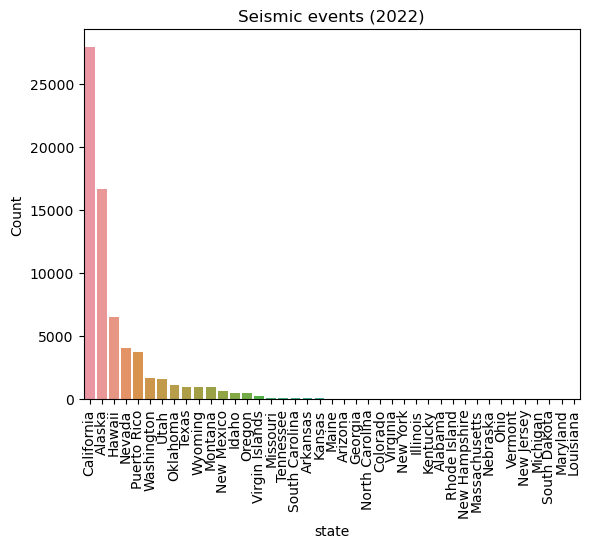

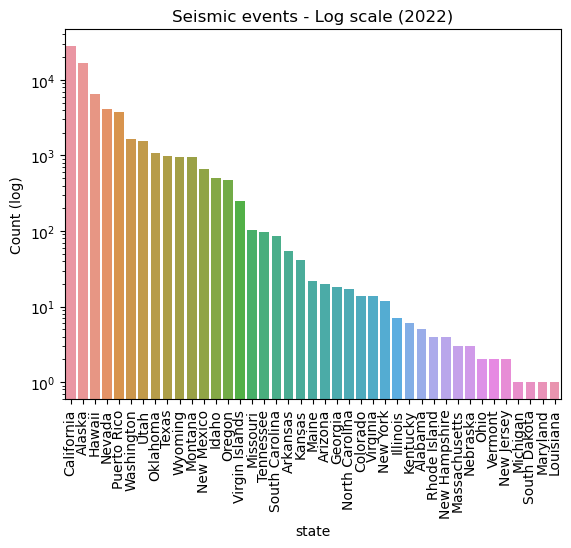

In [18]:
sns.countplot(x = 'state', data = US_df, order = US_df['state'].value_counts(ascending = False).index)
plt.xlabel('state')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Seismic events (2022)')
plt.show()

sns.countplot(x = 'state', data = US_df, order = US_df['state'].value_counts(ascending = False).index)
plt.xlabel('state')
plt.xticks(rotation = 90)
plt.title('Seismic events - Log scale (2022)')
plt.yscale('log')
plt.ylabel('Count (log)')
plt.show()

While using a logarithmic scale allows us to see more clearly the differences between states with lower numbers of seismic events, it really obscures the degree to which states such as California and Alaska surpass others with their seismic event counts. The purpose of this step was to determine if any states have significantly more seismic events than others, which is better accomplished by the first (non-logarithmic scale) plot. 

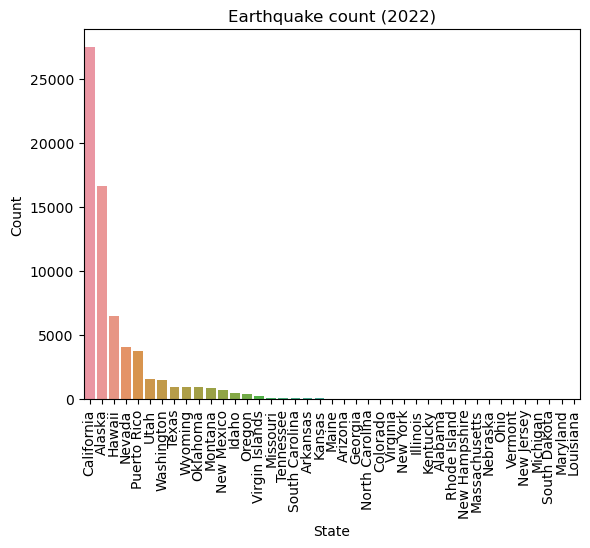

In [19]:
earthquakes = US_df[US_df['type'] =='earthquake']
'''Creates a new dataframe containing only earthquakes'''
sns.countplot(x = 'state', data = earthquakes, order = earthquakes['state'].value_counts(ascending=False).index)
plt.xlabel('State')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Earthquake count (2022)')
plt.show()

Issues to Analyze (2):
What is the maximum magnitude within each state? Can any other insights be drawn from the measures of central tendancy/spread of earthquake magnitudes?

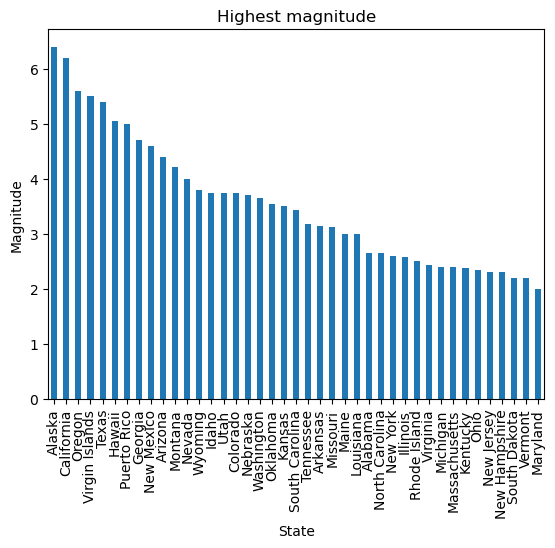

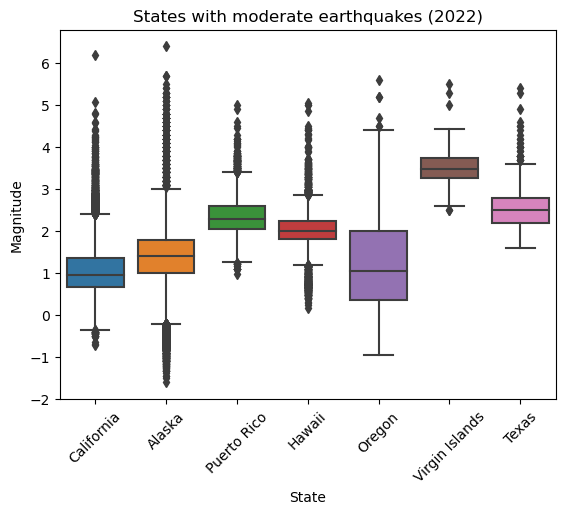

In [20]:
US_df.groupby('state')['mag'].max().sort_values(ascending = False).plot(kind = 'bar', xlabel = 'State', ylabel = 'Magnitude', title = 'Highest magnitude')
'''Returns the highest recorded earthquake magnitude for each state'''
plt.xticks(rotation = 90)
plt.show()

max_mags = pd.DataFrame(earthquakes.groupby('state')['mag'].max()).reset_index()
'''Creates a df with the max magnitude recorded for each state'''
mod_quake_states = max_mags[max_mags['mag'] >= 5.0]
'''Subsets this df for states whose max magnitude is >= 5.0'''
earthquakes_to_analyze = earthquakes[earthquakes['state'].isin(mod_quake_states['state'])]
'''Subsets the original df for all records pertaining to the states whose max magnitude is >= 5.0'''

sns.boxplot(x = 'state', y = 'mag', data = earthquakes_to_analyze).set(xlabel='State', ylabel = 'Magnitude')
plt.title('States with moderate earthquakes (2022)')
plt.xticks(rotation = 45)
plt.show()

Insights(2):
The highest recorded earthquake magnitudes in 2022 were in California and Alaska, the two states with the highest number of earthquakes. By viewing all state's max magnitudes, we see that many did not have earthquakes large enough to be felt by humans (magnitudes < 4), and only a few had earthquakes large enough to be cause property damage (magnitude >= 5) (https://www.usgs.gov/media/images/eq-magnitude-energy-release-and-shaking-intensity-5). Our original dataframe was subsetted to include only seismic activity from these states, which will be used to complete the rest of our analysis. 

A boxplot of magnitudes within these states reveals that most have very low magnitudes, with no mean values exceding the "felt by humans' threshold of 4.0. This is important because it shows that no states have consistently high magnitude earthquakes, although the two states with the highest number of earthquakes also had the highest recorded magnitudes. It is also worth noting that the Virgin Islands had the highest mean value, as well as an IQR above that of all other states. 

Issues to Analyze (3): 
Which states have the most strong earthquakes? Which states have the most moderate earthquakes? 

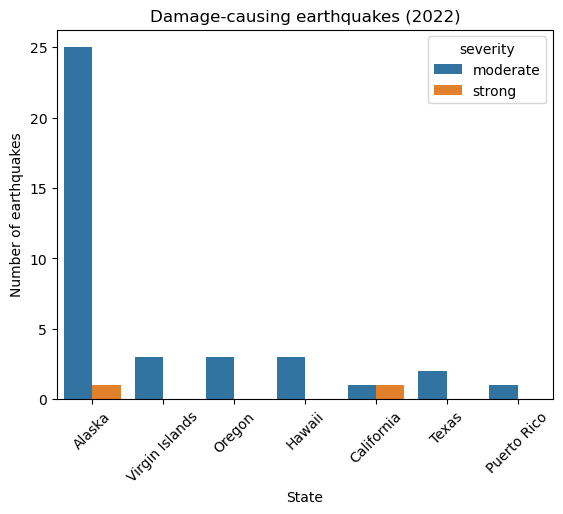

In [21]:
moderate_and_strong = earthquakes_to_analyze[earthquakes_to_analyze['severity'].isin(['moderate', 'strong'])]
'''Subsets our dataframe of relevant  earthquakes for those that are considered moderate or strong'''
sns.countplot(x = 'state', data = moderate_and_strong, hue = 'severity').set(xlabel = 'State', ylabel = 'Number of earthquakes')
plt.title('Damage-causing earthquakes (2022)')
plt.xticks(rotation = 45)
plt.show()

Issues to Analyze (4):
For states with strong earthquakes, how does seismic activity look in the period of time leading up to and following the seismic event? Is this the same for moderate earthquakes?

In [22]:
california_earthquakes = earthquakes_to_analyze[earthquakes_to_analyze['state'] == 'California']
'''Create a new dataframe with only California earthquakes, and identify the date/time when the strong earthquake occured'''
california_earthquakes[california_earthquakes['severity'] == 'strong']

,time,latitude,longitude,depth,mag,magType,place,type,state,severity,depth category
65786,2022-11-04T10:02:48.196Z,28.142,-112.3013,10.0,6.2,mw,Gulf of California,earthquake,California,strong,shallow


In [23]:
alaska_earthquakes = earthquakes_to_analyze[earthquakes_to_analyze['state'] == 'Alaska']
'''Create a new dataframe with only Alaska earthquakes, and identify the date/time when the strong earthquake occured'''
alaska_earthquakes[alaska_earthquakes['severity'] == 'strong']

,time,latitude,longitude,depth,mag,magType,place,type,state,severity,depth category
24647,2022-06-04T23:38:13.064Z,52.067,178.2804,104.6,6.4,mw,"Rat Islands, Aleutian Islands, Alaska",earthquake,Alaska,strong,intermediate


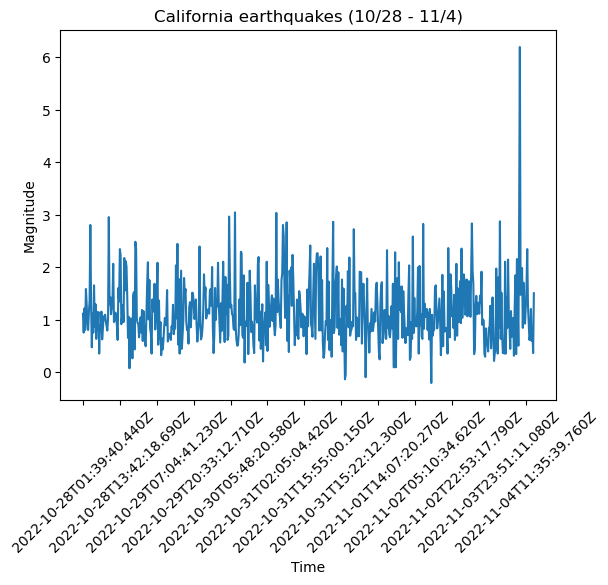

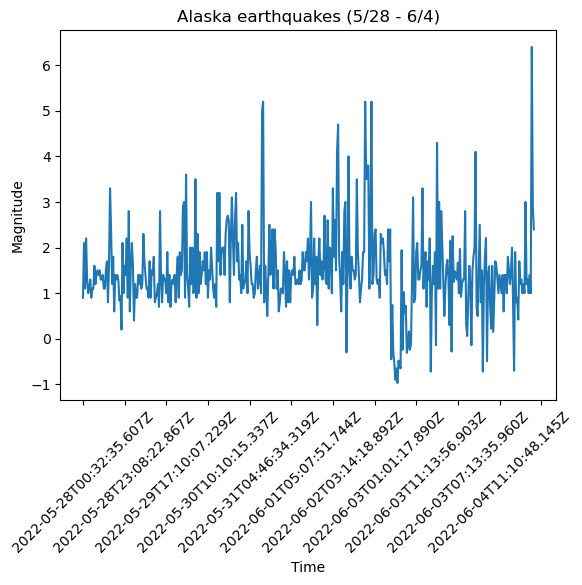

In [24]:
cali_strong_quake = california_earthquakes[(california_earthquakes['time'] >= '2022-10-28') & (california_earthquakes['time'] <= '2022-11-04T12:00:00')]
'''Creates a new dataframe containing all earthquakes that occured in California in the week leading up to the strong earthquake'''
sns.lineplot(data = cali_strong_quake, x = 'time', y = 'mag', ci=None).xaxis.set_major_locator(plt.MaxNLocator(15))
plt.xlabel('Time')
plt.xticks(rotation = 45)
plt.ylabel('Magnitude')
plt.title('California earthquakes (10/28 - 11/4)')
plt.show()

alaska_strong_quake = alaska_earthquakes[(alaska_earthquakes['time'] >= '2022-05-28') & (alaska_earthquakes['time'] < '2022-06-05')]
'''Creates a new dataframe containing all earthquakes that occured in Alaska in the week leading up to the strong earthquake'''
sns.lineplot(data = alaska_strong_quake, x = 'time', y = 'mag', ci=None).xaxis.set_major_locator(plt.MaxNLocator(15))
plt.xlabel('Time')
plt.xticks(rotation = 45)
plt.ylabel('Magnitude')
plt.title('Alaska earthquakes (5/28 - 6/4)')
plt.show()

Insights(4):
As we examine a 5-day window leading up to the only 'strong' earthquakes that occured in 2022, there is no discernible irregularities in the earthquake magnitudes recorded. This is important because it eliminates the possibility of developing an alarm for a serious earthquake based on earthquake magnitudes recorded leading up to the event. 

Issues to Analyze (5):
If we distinguish between different kinds of seismic events, do we see any trends emerge in the period of time leading up to an earthquake?

Average quarry blast mag: 1.3930574712643689
Quarry blast mag std dev: 0.2909407395646632
Highest mag in this timeframe: nan
Highest overall mag: 2.34


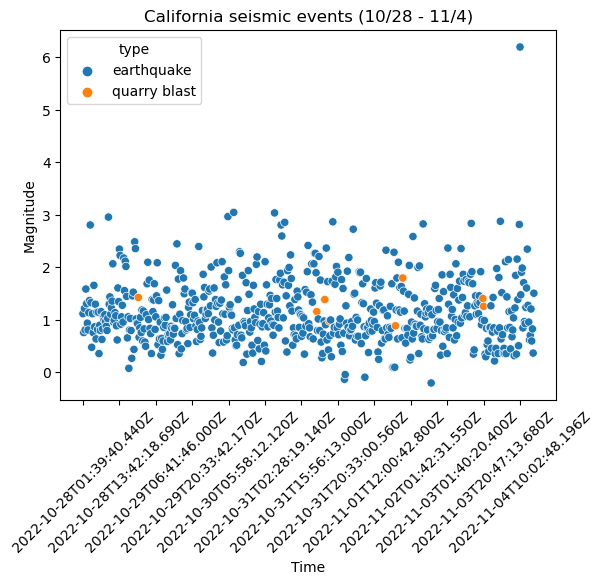

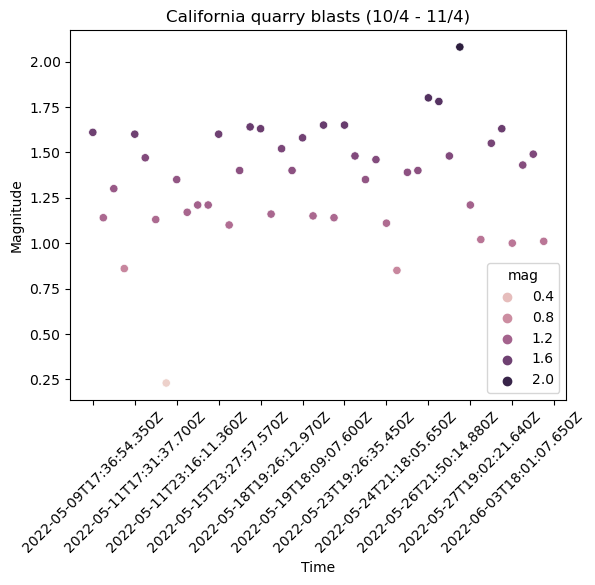

In [25]:
california_seismic = US_df[US_df['state'] == 'California']
'''Subsets original dataframe for all seismic events in California'''
cali_quarry = california_seismic[california_seismic['type'] =='quarry blast']
'''Creates a new dataframe containing only the quarry blasts in California'''
print('Average quarry blast mag: ' + str(np.mean(cali_quarry['mag'])))
print('Quarry blast mag std dev: ' + str(np.std(cali_quarry['mag'])))
print('Highest mag in this timeframe: ' + str(cali_strong_quake[cali_strong_quake['type'] == 'quarry blast']['mag'].max()))
print('Highest overall mag: ' + str(cali_quarry['mag'].max()))
cali_strong_quake = california_seismic[(california_seismic['time'] >= '2022-10-28') & (california_seismic['time'] <= '2022-11-04T12:00:00')]
'''Creates a new dataframe containing California seismic events within the same timeframe as before: 1 week leading up to the strong earthquake'''
sns.scatterplot(data = cali_strong_quake, x = 'time', y = 'mag', ci=None, hue = 'type').xaxis.set_major_locator(plt.MaxNLocator(15))
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('California seismic events (10/28 - 11/4)')
plt.xticks(rotation = 45)
plt.show()

cali_quarry_time = cali_quarry[(cali_quarry['time'] >= '2022-05-05') & (cali_quarry['time'] < '2022-06-05')]
'''Creates a new dataframe containing California seismic events within the same timeframe as before: 1 week leading up to the strong earthquake'''
sns.scatterplot(data = cali_quarry_time, x = 'time', y = 'mag', ci=None, hue = 'mag').xaxis.set_major_locator(plt.MaxNLocator(15))
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('California quarry blasts (10/4 - 11/4)')
plt.xticks(rotation = 45)
plt.show()

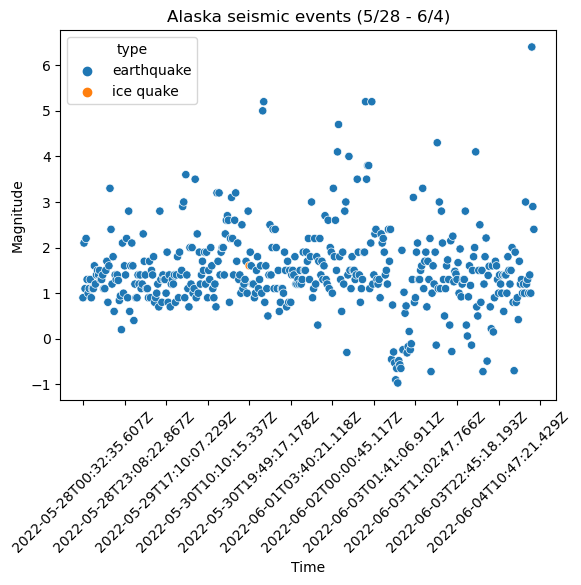

In [26]:
alaska_seismic = US_df[US_df['state'] == 'Alaska']
'''Creates a new dataframe containing all seismic activity in Alaska'''
alaska_strong_quake = alaska_seismic[(alaska_seismic['time'] >= '2022-05-28') & (alaska_seismic['time'] < '2022-06-05')]
'''Subsets the dataframe above for all seismic activity in Alaska which occured in the week leading up to the strong earthquake'''
sns.scatterplot(data = alaska_strong_quake, x = 'time', y = 'mag', ci=None, hue = 'type').xaxis.set_major_locator(plt.MaxNLocator(15))
plt.xlabel('Time')
plt.xticks(rotation = 45)
plt.ylabel('Magnitude')
plt.title('Alaska seismic events (5/28 - 6/4)')
plt.show()


Issues to Analyze (6):
Did Alaska have any other ice quakes which were soon followed by an earthquake of at least 'moderate' size?

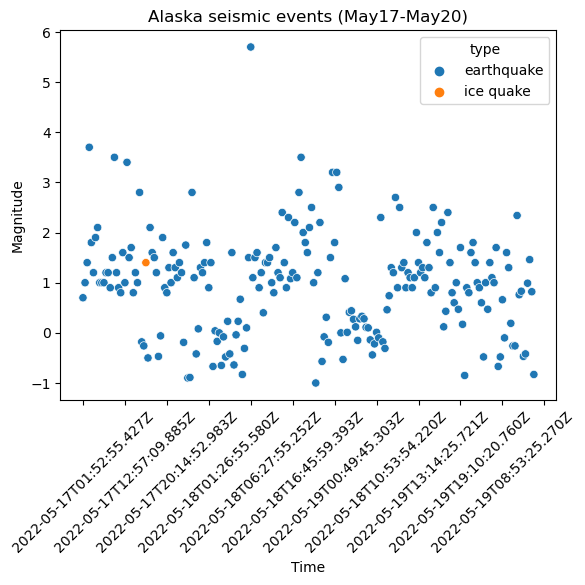

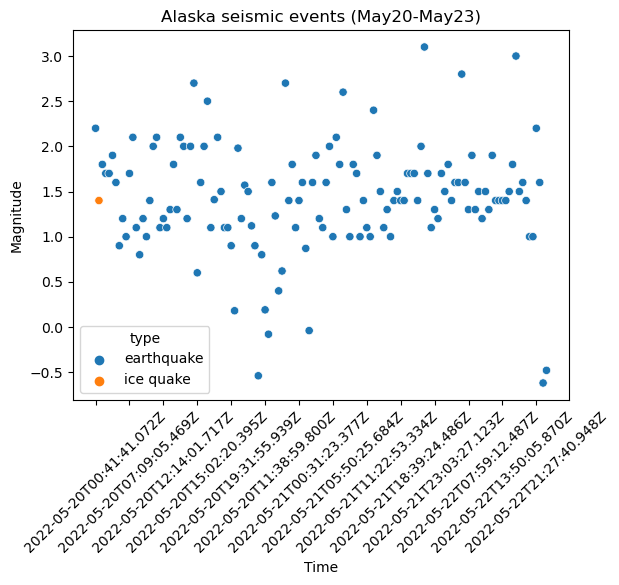

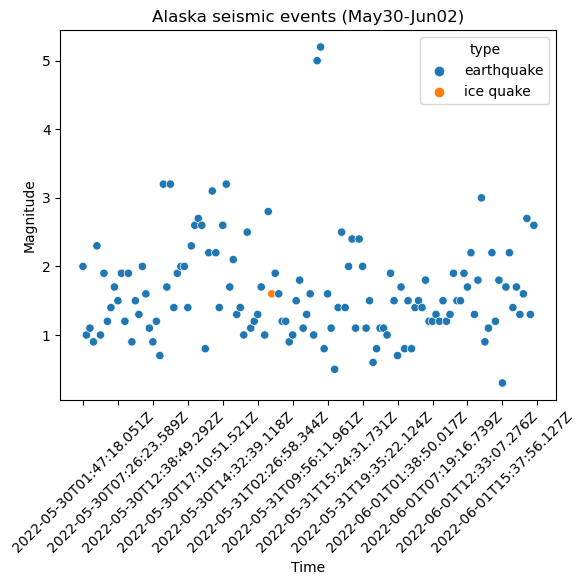

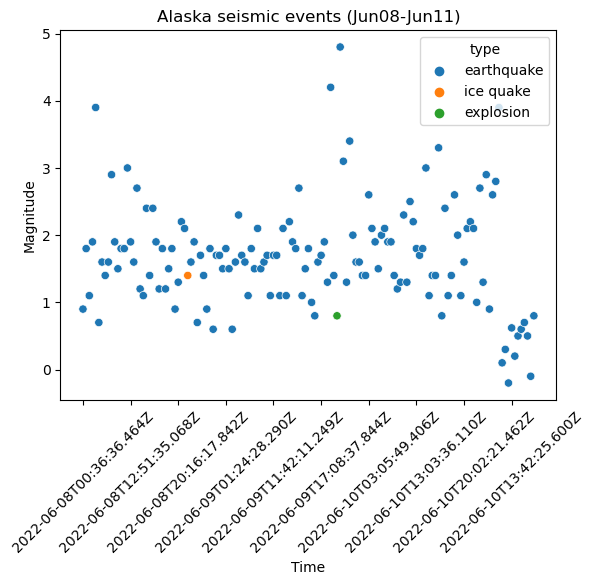

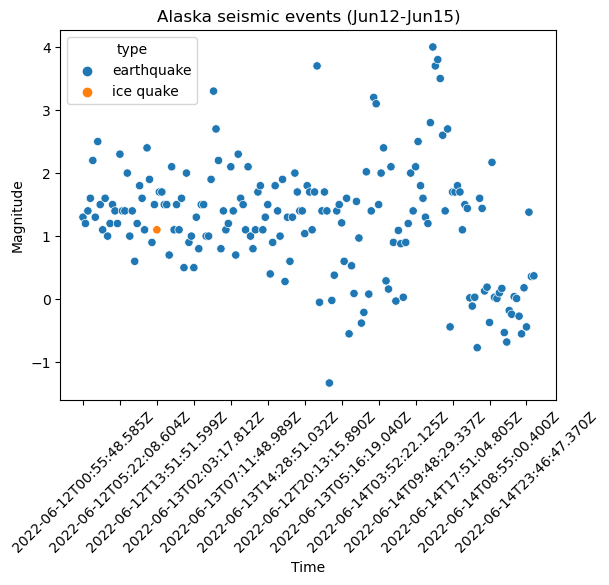

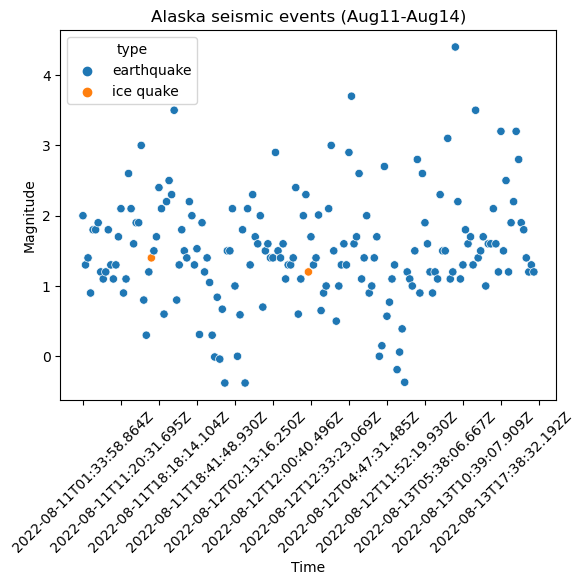

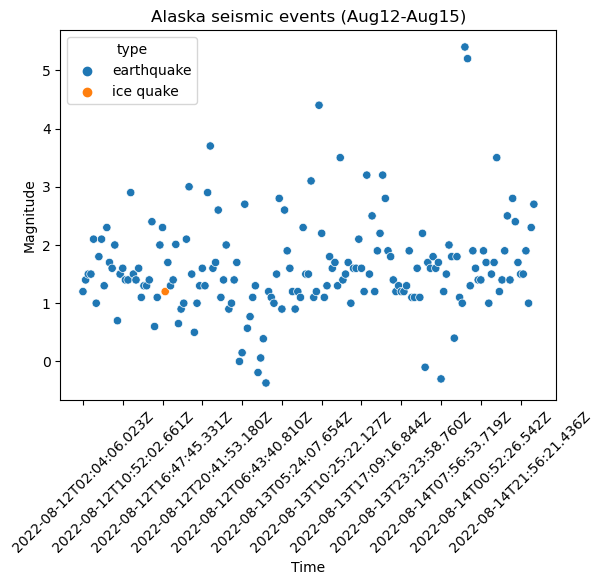

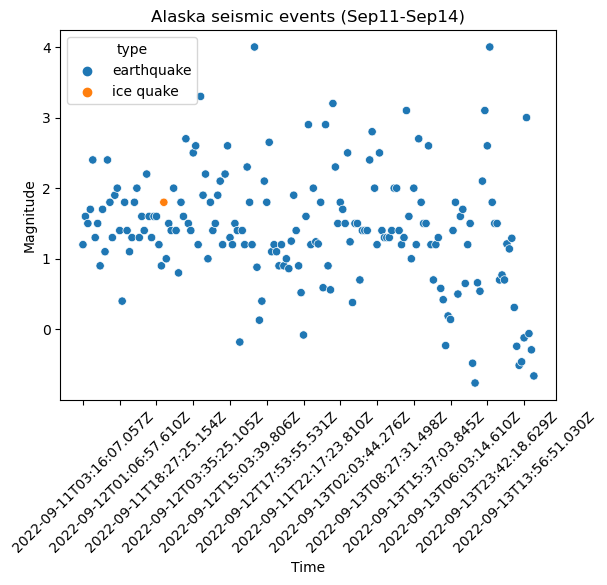

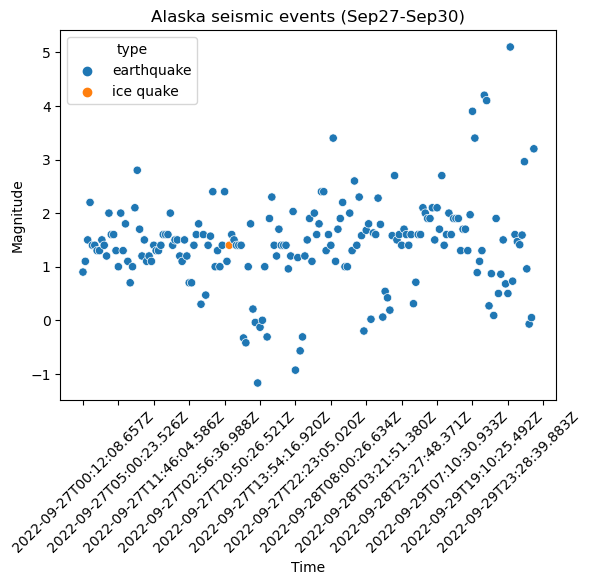

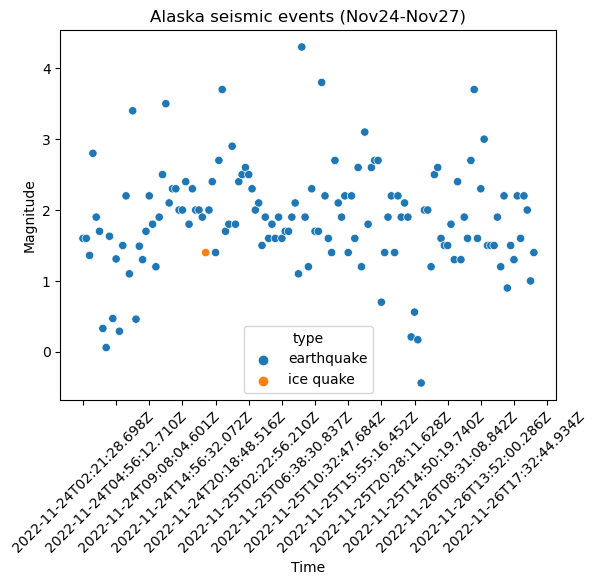

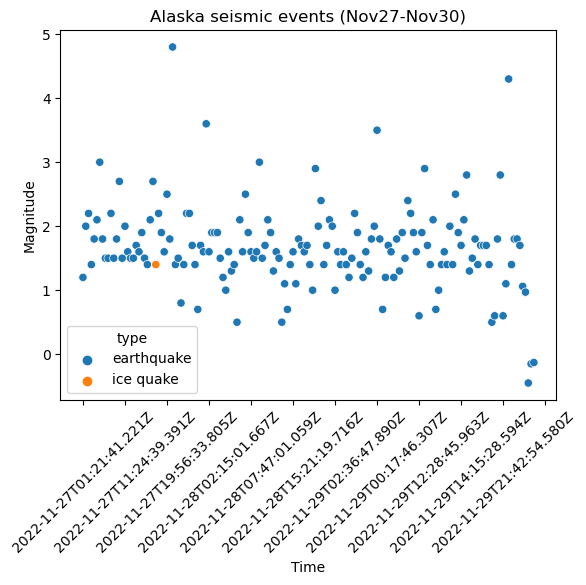

In [27]:
alaska_icequakes = alaska_seismic[alaska_seismic['type'] == 'ice quake']
'''Creates a new df containing only the icequakes in Alaska'''

def plot_mag_future(df1, df2, time_col, n_days, state): 
    '''Iterates over the time_col in df1, creating a start date and an end date n_days later. Subsets df2 for this window, and creates a scatter plot of magnitude by time_col'''
    for x in df1[time_col]:
        start_date = pd.to_datetime(x).date()
        end_date = start_date + timedelta(days = n_days)
        timeframe = df2[(df2[time_col] >= str(start_date)) & (df2[time_col] < str(end_date))]
        sns.scatterplot(data = timeframe, x = time_col, y = 'mag', ci=None, hue = 'type').xaxis.set_major_locator(plt.MaxNLocator(15))
        plt.xlabel('Time')
        plt.xticks(rotation = 45)
        plt.ylabel('Magnitude')
        plt.title(state + ' seismic events ' + '(' + start_date.strftime('%b%d') + '-' + end_date.strftime('%b%d') + ')')
        plt.show()
        
plot_mag_future(alaska_icequakes, alaska_seismic, 'time', 3, 'Alaska')

V) Insights

Insights (1):
California and Alaska have a significantly higher number of seismic events in 2022 than all other states, as well as a significantly higher number of earthquakes specifically.


Insights (2):
The highest recorded earthquake magnitudes in 2022 were in California and Alaska, the two states with the highest number of earthquakes. By viewing all state's max magnitudes, we see that many did not have earthquakes large enough to be felt by humans (magnitudes < 4), and only a few had earthquakes large enough to be cause property damage (magnitude >= 5) (https://www.usgs.gov/media/images/eq-magnitude-energy-release-and-shaking-intensity-5). Our original dataframe was subsetted to include only seismic activity from these states, which will be used to complete the rest of our analysis. A boxplot of magnitudes within these states reveals that most have very low magnitudes, with no mean values exceding the "felt by humans' threshold of 4.0. This is important because it shows that no states have consistently high magnitude earthquakes, although the two states with the highest number of earthquakes also had the highest recorded magnitudes. It is also worth noting that the Virgin Islands had the highest mean value, as well as an IQR above that of all other states. 


Insights (3):
The USGS earthquake classification states that any magnitudes of 5 or above are likely to cause property damage, and this threshold corresponds to the 'moderate' severity class. When viewing which of our selected states has the highest number of earthqaukes in this category or higher, we see that Alaska and California are the only two states with a 'strong' earthquake occurring in the last year. However, despite California having aprroximately 10,000 more earthquakes than Alaska, the latter had a significantly higher number of 'moderate' earthquakes than the former. This is important because it suggests that factors could be contributing to the size of earthquakes other than those contributing to earthquake frequency.


Insights (4):
As we examine a 5-day window leading up to the only 'strong' earthquakes that occured in 2022, there is no discernible irregularities in the earthquake magnitudes recorded. This is important because it eliminates the possibility of developing an alarm for a serious earthquake based on earthquake magnitudes recorded leading up to the event. 

Insights (5):
When we factor in other forms of seismic activity besides earthquakes, we see that in the same time period leading up to the strong earthquakes (1 week), there were 8 quarry blasts which took place in California, 7 of which occured within approximately 72 hours of each other. None of the corresponding magnitudes were large enough for humans to feel them, and all but one were within 1 standard deviation of the mean. Reviewing the quarry blasts in California over the last month, we see that this frequency is very common; we also see that while one quarry blast had a higher magnitude than others, it was still relatively low, and lower than that of other quarry blasts in 2022. This is significant because it eliminates the possibility of drawing a correlation between California's strong earthquake in 2022 and the frequency/size of seismic activity caused by quarry blasts. When we examine this period of time (1 week) leading up to Alaska's strong earthquake, we see that while no quarry blasts occured, there was an ice quake of very low magnitude. This is another form of seismic activity caused by frozen soil or rock cracking from the pressure of water rapidly expanding when temperatures drop.

Insights (6):
11 icequakes took place in 2022, and 6 of those were followed by an 'moderate' earthquake within 48 hours. While the icequakes themselves had too low of a magnitude to be felt by humans, these are a different form of seismic activity, and there appears to be some correlation between icequakes and moderate earthquake occurences. While this is not enough to create any sort of alarms or warning systems based on the occurence of icequakes, it is significant because it creates a new hypothesis to direct future research. 